# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [5]:
# import numpy and pandas

import numpy as np
import pandas as pd

# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [6]:
# Run this code:

pokemon = pd.read_csv('pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [7]:
# Your code here:
pokemon.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [8]:
# Your code here:
pokemon.Legendary=pokemon.Legendary.apply(lambda x: 0 if x == False else 1)

In [9]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


In [10]:
pokemon.Legendary.value_counts()

0    735
1     65
Name: Legendary, dtype: int64

In [11]:
# 735 non legendary pokemon
# 65 legendary pokemon

Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [12]:
# Your code here:

pokemon.groupby(by='Legendary').Total.describe()[['mean','std']]

,mean,std
Legendary,,
0,417.213605,106.760417
1,637.384615,60.937389


The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

In [13]:
# Your code here:

from scipy import stats

In [14]:
stats.ttest_ind(pokemon.loc[pokemon.Legendary == 0,'Total'], 
                pokemon.loc[pokemon.Legendary == 1,'Total'])

Ttest_indResult(statistic=-16.386116965872425, pvalue=3.0952457469652825e-52)

What do you conclude from this test? Write your conclusions below.

In [15]:
# Your conclusions here:
# the t test compares if the 2 population have the same average or not.
# Since in this case p-value < 0.05, 
# we can reject the null hypothesis H0 that both types of pokemon have the same characteristics.

How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

In [16]:
# Your code here:

pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ghost        32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all other Pokemon.

In [29]:
(pokemon['Type 1'].apply(lambda x: 1 if x == 'Water' else 0)).sum()

112

In [30]:
pokemon['is_water'] = pokemon['Type 1'].apply(lambda x: 1 if x == 'Water' else 0)

In [31]:
# Your code here:

pokemon.groupby(by='is_water').Total.describe()[['mean','std']]


,mean,std
is_water,,
0,435.859012,121.091682
1,430.455357,113.188266


Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

In [34]:
pokemon.loc[pokemon.is_water == 0,'Total']

0      318
1      405
2      525
3      625
4      309
      ... 
795    600
796    700
797    600
798    680
799    600
Name: Total, Length: 688, dtype: int64

In [35]:
# Your code here:
stats.ttest_ind(pokemon.loc[pokemon.is_water == 0,'Total'],
                pokemon.loc[pokemon.is_water != 0,'Total'])

Ttest_indResult(statistic=0.4418547448849676, pvalue=0.6587140317488793)

Write your conclusion below.

In [42]:
# Considering alpha ==0.05, as p-value in this case is > alpha, it's not possible to reject the null hypothesis.
# In other words, compared to Water-type pokemon, all the rest have the same average power.

# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

`hypothesis:` defense score == attack score

In [40]:
# Your code here:

pokemon.head(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,is_water
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0,0


In [39]:
stats.ttest_rel(pokemon.Attack, pokemon.Defense)

Ttest_relResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05)

Describe the results of the test in the cell below.

In [12]:
# Your conclusions here:

# Considering alpha == 0.05, 
# as p-value in this case is < alpha, it's possible to reject the null hypothesis.
# In other words, comparing the Attack and Defense scores, they don't have the same average power.
# Being the 'Attack' score greater. 

We are also curious about whether there is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

In [41]:
# Your code here:
stats.ttest_rel(pokemon['Sp. Atk'], pokemon['Sp. Def'])


Ttest_relResult(statistic=0.853986188453353, pvalue=0.3933685997548122)

Describe the results of the test in the cell below.

In [43]:
# Your conclusions here:

# Considering alpha == 0.05, 
# as p-value in this case is > alpha, it's not possible to reject the null hypothesis.
# In other words, comparing the Special Attack and Defense scores, they have the same average power.

As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

In [51]:
from sklearn.preprocessing import scale
import seaborn as sns
import matplotlib.pyplot as plt

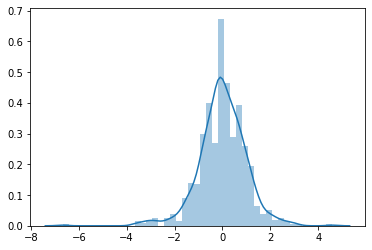

In [52]:
# Your code here:
    
diff = scale(pokemon.Attack - pokemon.Defense)

sns.distplot(diff);

In [58]:
stats.ttest_1samp(diff, 0)

Ttest_1sampResult(statistic=-1.569110844046603e-16, pvalue=0.9999999999999999)

In [57]:
# H0 of shapiro test: is a normal distribution
stats.shapiro(diff)

# p-value < alpha, H0 is rejected -> it's not a normal distribution

(0.9605212807655334, 7.358686143071891e-14)

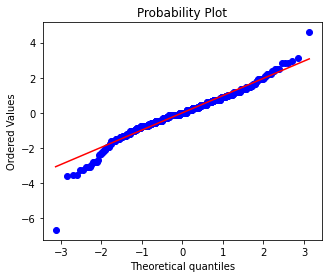

In [55]:
plt.figure(figsize=(5, 4))

stats.probplot(diff, plot=plt, dist='norm')

plt.show()

# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [60]:
# Your code here:

pd.crosstab(pokemon.Legendary, pokemon.is_water)

is_water,0,1
Legendary,,
0,627,108
1,61,4


Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html).

In [61]:
from scipy.stats import chi2_contingency

In [62]:
# Your code here:
chi2_contingency(pd.crosstab(pokemon.Legendary, pokemon.is_water))


(2.9429200762850503,
 0.08625467249550949,
 1,
 array([[632.1, 102.9],
        [ 55.9,   9.1]]))

Based on a 95% confidence, should we reject the null hypothesis?

In [19]:
# Your answer here:
# since p-value (0.086) > alpha, we cannot reject the null hypothesis